In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Satış verisi ve müşteri verileri:
sales_df= pd.read_csv("satis_verisi_5000.csv")   
customer_df= pd.read_csv("musteri_verisi_5000_utf8.csv")  

Veri Temizleme ve Manipülasyonu 

In [2]:
print("\nSatış Verisi Bilgileri:")
print(sales_df.info())


Satış Verisi Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5000 non-null   int64 
 1   tarih         5000 non-null   object
 2   ürün_kodu     5000 non-null   object
 3   ürün_adi      5000 non-null   object
 4   kategori      5000 non-null   object
 5   fiyat         5000 non-null   object
 6   adet          5000 non-null   int64 
 7   toplam_satis  5000 non-null   object
 8   musteri_id    5000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 351.7+ KB
None


In [3]:
print("Satış Verisi :")
print(sales_df.head())

print("\nSatış Verisi Eksik Değer Sayısı:")
print(sales_df.isnull().sum())

Satış Verisi :
   Unnamed: 0       tarih ürün_kodu    ürün_adi    kategori    fiyat  adet  \
0           0  2023-07-02      P032       Mouse  Elektronik   1207.3    13   
1           1  2024-02-11      P011       Kalem   Kırtasiye   237.14    16   
2           2  2023-03-06      P024  Bilgisayar  Elektronik  1024.29     9   
3           3  2024-04-11      P063       Klima  Elektronik  1477.88     9   
4           4  2024-01-08      P063       Klima  Elektronik   949.43    19   

        toplam_satis  musteri_id  
0            15694.9        9225  
1            3794.24        3955  
2            9218.61        2367  
3  13300920000000000        2869  
4           18039.17        9724  

Satış Verisi Eksik Değer Sayısı:
Unnamed: 0      0
tarih           0
ürün_kodu       0
ürün_adi        0
kategori        0
fiyat           0
adet            0
toplam_satis    0
musteri_id      0
dtype: int64


In [4]:
hatalar_fiyat = sales_df[pd.to_numeric(sales_df['fiyat'], errors='coerce').isnull()]
hatalar_toplam_satis = sales_df[pd.to_numeric(sales_df['toplam_satis'], errors='coerce').isnull()]

# Hatalı satırlar:
print("Fiyat kolonunda hatalı veriler:")
print(hatalar_fiyat)

print("\nToplam Satış kolonunda hatalı veriler:")
print(hatalar_toplam_satis)

Fiyat kolonunda hatalı veriler:
      Unnamed: 0       tarih ürün_kodu    ürün_adi         kategori  \
159          159  2023-10-23      P018     Telefon       Elektronik   
195          195  2023-05-18      P063       Klima       Elektronik   
217          217  2023-03-23      P018     Telefon       Elektronik   
250          250  2023-09-13      P032       Mouse       Elektronik   
485          485  2024-10-30      P010       Çanta            Giyim   
566          566  2024-05-03      P011       Kalem        Kırtasiye   
656          656  2023-12-30      P063       Klima       Elektronik   
726          726  2024-04-11      P011       Kalem        Kırtasiye   
746          746  2024-05-24      P087    Kulaklık       Elektronik   
766          766  2024-09-12      P010       Çanta            Giyim   
770          770  2024-09-30      P010       Çanta            Giyim   
794          794  2022-11-25      P097   Su Şişesi  Mutfak Ürünleri   
1125        1125  2022-12-08      P082      D

In [5]:
# Hatalı girişlerde 'toplam_satis' sütununu düzelt
sales_df.loc[~sales_df['toplam_satis'].apply(lambda x: str(x).replace('.', '', 1).isdigit()), 'toplam_satis'] = (
    sales_df['fiyat'] * sales_df['adet']
)

# Hatalı fiyatları düzelt: Geriye kalan hatalı girişleri NaN yaparak medyan ile doldurun
sales_df['fiyat'] = pd.to_numeric(sales_df['fiyat'], errors='coerce')
sales_df['fiyat'].fillna(sales_df['fiyat'].median(), inplace=True)
 

In [6]:
sales_df['toplam_satis_kontrol'] = sales_df['fiyat'] * sales_df['adet']
hatali_satis = sales_df[sales_df['toplam_satis'] != sales_df['toplam_satis_kontrol']]
print(hatali_satis)

      Unnamed: 0       tarih ürün_kodu    ürün_adi         kategori    fiyat  \
0              0  2023-07-02      P032       Mouse       Elektronik  1207.30   
1              1  2024-02-11      P011       Kalem        Kırtasiye   237.14   
2              2  2023-03-06      P024  Bilgisayar       Elektronik  1024.29   
3              3  2024-04-11      P063       Klima       Elektronik  1477.88   
4              4  2024-01-08      P063       Klima       Elektronik   949.43   
...          ...         ...       ...         ...              ...      ...   
4995        4995  2023-06-11      P037       Fırın      Ev Aletleri  1425.17   
4996        4996  2024-09-11      P032       Mouse       Elektronik   773.54   
4997        4997  2024-08-26      P087    Kulaklık       Elektronik   603.25   
4998        4998  2023-10-11      P097   Su Şişesi  Mutfak Ürünleri   957.64   
4999        4999  2023-06-20      P097   Su Şişesi  Mutfak Ürünleri   167.04   

      adet       toplam_satis  musteri_

In [7]:
print(sales_df[['toplam_satis_kontrol', 'fiyat']].info())
print(sales_df[['toplam_satis_kontrol', 'fiyat']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   toplam_satis_kontrol  5000 non-null   float64
 1   fiyat                 5000 non-null   float64
dtypes: float64(2)
memory usage: 78.3 KB
None
   toplam_satis_kontrol    fiyat
0              15694.90  1207.30
1               3794.24   237.14
2               9218.61  1024.29
3              13300.92  1477.88
4              18039.17   949.43


In [8]:
print(sales_df.info())
print(sales_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5000 non-null   int64  
 1   tarih                 5000 non-null   object 
 2   ürün_kodu             5000 non-null   object 
 3   ürün_adi              5000 non-null   object 
 4   kategori              5000 non-null   object 
 5   fiyat                 5000 non-null   float64
 6   adet                  5000 non-null   int64  
 7   toplam_satis          5000 non-null   object 
 8   musteri_id            5000 non-null   int64  
 9   toplam_satis_kontrol  5000 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 390.8+ KB
None
        Unnamed: 0        fiyat         adet   musteri_id  \
count  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2499.500000   746.897466    10.071800  5462.697000   
std    1443.520003   426.7995

In [9]:
unique_products = sales_df['ürün_adi'].nunique()
print(f"Farklı ürün çeşidi sayısı: {unique_products}")

Farklı ürün çeşidi sayısı: 10


In [10]:
unique_product_names = sales_df['ürün_adi'].unique()
print(unique_product_names)

['Mouse' 'Kalem' 'Bilgisayar' 'Klima' 'Fırın' 'Defter' 'Çanta' 'Su Şişesi'
 'Kulaklık' 'Telefon']


In [11]:
unique_category_count = sales_df['kategori'].nunique()
print(f"Benzersiz kategori sayısı: {unique_category_count}")

Benzersiz kategori sayısı: 5


In [12]:
unique_categories = sales_df['kategori'].unique()
print("Kategoriler:")
print(unique_categories)

Kategoriler:
['Elektronik' 'Kırtasiye' 'Ev Aletleri' 'Giyim' 'Mutfak Ürünleri']


In [13]:
print("\nMüşteri Verisi Bilgileri:")
print(customer_df.info())


Müşteri Verisi Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   musteri_id       5000 non-null   int64  
 1   isim             5000 non-null   object 
 2   cinsiyet         5000 non-null   object 
 3   yas              5000 non-null   int64  
 4   sehir            5000 non-null   object 
 5   harcama_miktari  5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB
None


In [14]:
print("\nMüşteri Verisi :")
print(customer_df.head())

print("\nMüşteri Verisi Eksik Değer Sayısı:")
print(customer_df.isnull().sum())


Müşteri Verisi :
   musteri_id      isim cinsiyet  yas      sehir  harcama_miktari
0        4353  Gülşahin    Kadın   57  Gaziantep          2726.01
1        8374  Yahşikan    Erkek   66  Gaziantep          4754.70
2        3902  Candeniz    Erkek   61      Konya           867.20
3        2080     Gözel    Erkek   64      Adana          2020.97
4        7901   Erdogan    Kadın   63   İstanbul          4334.16

Müşteri Verisi Eksik Değer Sayısı:
musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
dtype: int64


- IQR yöntemini kullanarak aykırı değerleri belirlemek için bir fonksiyon tanımladım.
- İlgili sütunlarda aykırı değerleri belirledim.
- Her sütunda tespit edilen aykırı değerlerin özetini çıkardım:

In [15]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


musteri_yas_outliers, yas_lower, yas_upper = find_outliers(customer_df, 'yas')
musteri_harcama_outliers, harcama_lower, harcama_upper = find_outliers(customer_df, 'harcama_miktari')
satis_fiyat_outliers, fiyat_lower, fiyat_upper = find_outliers(sales_df, 'fiyat')
satis_toplam_outliers, toplam_lower, toplam_upper = find_outliers(sales_df, 'toplam_satis_kontrol')
satis_adet_outliers, adet_lower, adet_upper = find_outliers(sales_df, 'adet')

outliers_summary = {
    "musteri_yas_outliers_count": len(musteri_yas_outliers),
    "musteri_harcama_outliers_count": len(musteri_harcama_outliers),
    "satis_fiyat_outliers_count": len(satis_fiyat_outliers),
    "satis_toplam_outliers_count": len(satis_toplam_outliers),
    "satis_adet_outliers_count": len(satis_adet_outliers),
    "yas_bounds": (yas_lower, yas_upper),
    "harcama_bounds": (harcama_lower, harcama_upper),
    "fiyat_bounds": (fiyat_lower, fiyat_upper),
    "toplam_satis_bounds": (toplam_lower, toplam_upper),
    "adet_bounds": (adet_lower, adet_upper)
}

outliers_summary

{'musteri_yas_outliers_count': 0,
 'musteri_harcama_outliers_count': 0,
 'satis_fiyat_outliers_count': 0,
 'satis_toplam_outliers_count': 36,
 'satis_adet_outliers_count': 0,
 'yas_bounds': (-8.0, 96.0),
 'harcama_bounds': (-2407.415, 7514.085),
 'fiyat_bounds': (-731.8975000000003, 2223.2425000000003),
 'toplam_satis_bounds': (-11890.12125, 25655.548749999998),
 'adet_bounds': (-10.0, 30.0)}

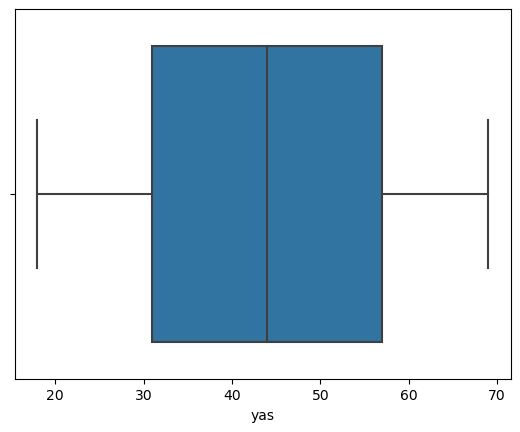

In [16]:
sns.boxplot(data=customer_df, x='yas')
plt.show();

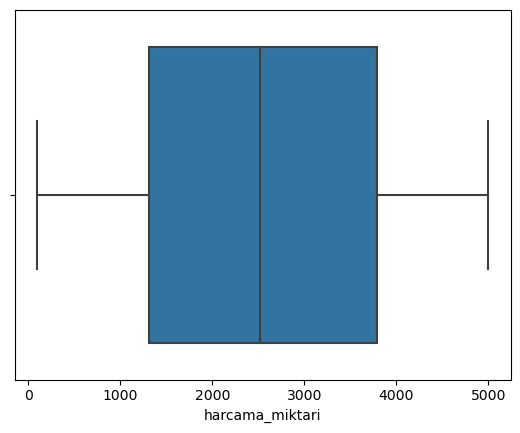

In [17]:
sns.boxplot(data=customer_df, x='harcama_miktari')
plt.show();

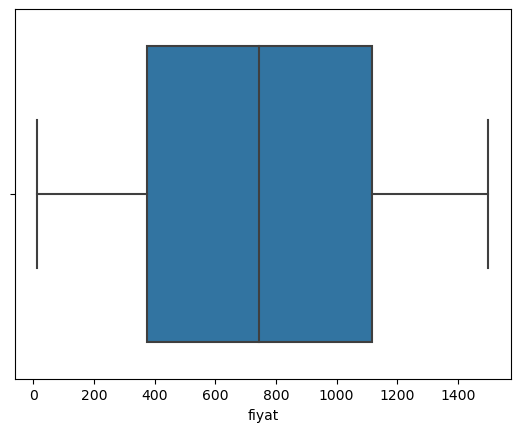

In [18]:
sns.boxplot(data=sales_df, x='fiyat')
plt.show();

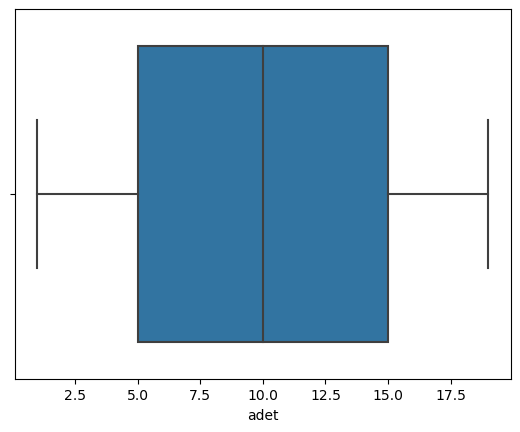

In [19]:
sns.boxplot(data=sales_df, x='adet')
plt.show()

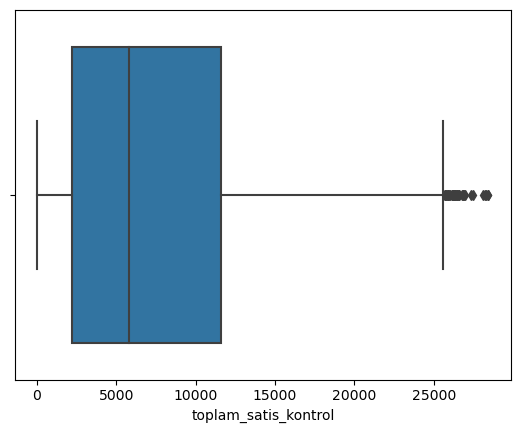

In [20]:
sns.boxplot(data=sales_df, x='toplam_satis_kontrol')
plt.show() 

- Winsorization işlemi için alt ve üst sınırları belirledim:
- Aykırı değerleri belirli bir aralığa çekme (Winsorization) işlemini yaptım:

In [21]:
lower_bound_toplam_satis = toplam_lower  
upper_bound_toplam_satis = toplam_upper  


sales_df['toplam_satis_kontrol'] = sales_df['toplam_satis_kontrol'].apply(
    lambda x: min(max(x, lower_bound_toplam_satis), upper_bound_toplam_satis)
)

sales_df.head()

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,toplam_satis_kontrol
0,0,2023-07-02,P032,Mouse,Elektronik,1207.30,13,15694.9,9225,15694.90
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955,3794.24
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367,9218.61
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869,13300.92
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724,18039.17


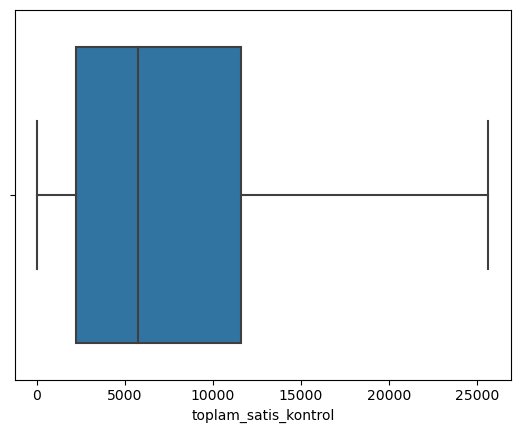

In [22]:
sns.boxplot(data=sales_df, x='toplam_satis_kontrol')
plt.show() 

Merged Data

In [23]:
merged_df = pd.merge(sales_df, customer_df, on='musteri_id', how='left')

In [24]:
merged_df.to_csv('merged_data.csv', index=False)
merged_df.head()

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,toplam_satis_kontrol,isim,cinsiyet,yas,sehir,harcama_miktari
0,0,2023-07-02,P032,Mouse,Elektronik,1207.30,13,15694.9,9225,15694.90,Masume,Kadın,35,İstanbul,3588.15
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955,3794.24,Fenni,Kadın,64,Konya,3742.46
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367,9218.61,Feyruz,Kadın,45,Bursa,197.55
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869,13300.92,Ülke,Kadın,43,İstanbul,3662.18
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724,18039.17,Tonguç,Erkek,41,Bursa,2536.20


Zaman Serisi Analizi

In [25]:
unique_products = sales_df['ürün_adi'].unique()
print("Veri setinde bulunan farklı ürünler:", unique_products)

Veri setinde bulunan farklı ürünler: ['Mouse' 'Kalem' 'Bilgisayar' 'Klima' 'Fırın' 'Defter' 'Çanta' 'Su Şişesi'
 'Kulaklık' 'Telefon']


In [26]:
print(sales_df.columns)

Index(['Unnamed: 0', 'tarih', 'ürün_kodu', 'ürün_adi', 'kategori', 'fiyat',
       'adet', 'toplam_satis', 'musteri_id', 'toplam_satis_kontrol'],
      dtype='object')


In [27]:
# tarih sütununu datetime formatına dönüştürdüm.
sales_df['tarih'] = pd.to_datetime(sales_df['tarih'], errors='coerce')
print(sales_df['tarih'].dtype)

datetime64[ns]


In [28]:
# Başlangıç ve bitiş tarihlerini görmek için: 
start_date = sales_df['tarih'].min()
end_date = sales_df['tarih'].max()

print(f"Başlangıç Tarihi: {start_date}")
print(f"Bitiş Tarihi: {end_date}")

Başlangıç Tarihi: 2022-11-06 00:00:00
Bitiş Tarihi: 2024-11-05 00:00:00


Haftalık Veri OLuşturma

In [29]:
weekly_sales = sales_df.resample('W-Mon', on='tarih')['toplam_satis_kontrol'].sum() # Haftalık periyot: Pazartesi başlangıçlı
# print("Haftalık Toplam Satış Trendi:\n", weekly_sales.head(50))

# Binlik ayırıcı ile formatladım.
formatted_weekly_sales = weekly_sales.apply(lambda x: f"{x:,.2f}")
print("Haftalık Toplam Satış Trendi:\n", formatted_weekly_sales.head())

Haftalık Toplam Satış Trendi:
 tarih
2022-11-07     61,323.49
2022-11-14    315,871.47
2022-11-21    342,691.67
2022-11-28    307,922.91
2022-12-05    367,450.98
Freq: W-MON, Name: toplam_satis_kontrol, dtype: object


Belirli Haftalarda Pik Değerler ve Düşüşler

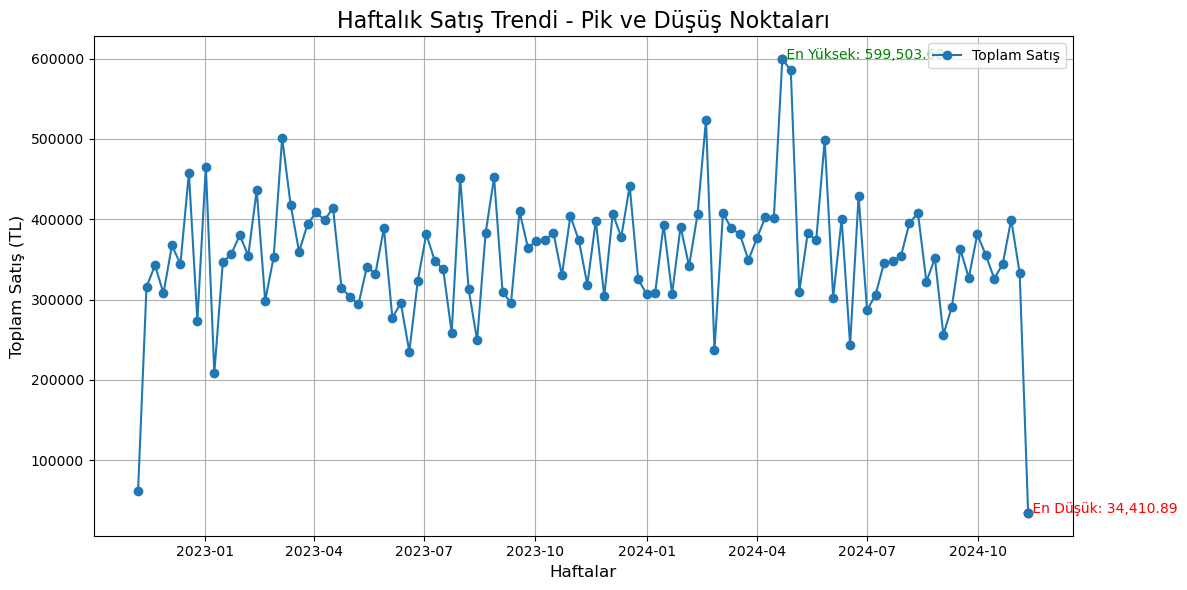

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', label="Toplam Satış")

# Pik noktaları etiketleme
max_week = weekly_sales.idxmax()
min_week = weekly_sales.idxmin()
plt.scatter([max_week, min_week], [weekly_sales.max(), weekly_sales.min()], color='red')
plt.text(max_week, weekly_sales.max(), f" En Yüksek: {weekly_sales.max():,.2f}", fontsize=10, color='green')
plt.text(min_week, weekly_sales.min(), f" En Düşük: {weekly_sales.min():,.2f}", fontsize=10, color='red')

plt.title("Haftalık Satış Trendi - Pik ve Düşüş Noktaları", fontsize=16)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hareketli Ortalama ile Trend:
Kısa vadeli dalgalanmaları yumuşatmak için hareketli ortalamaları kullanarak uzun vadeli trendleri analiz ettim

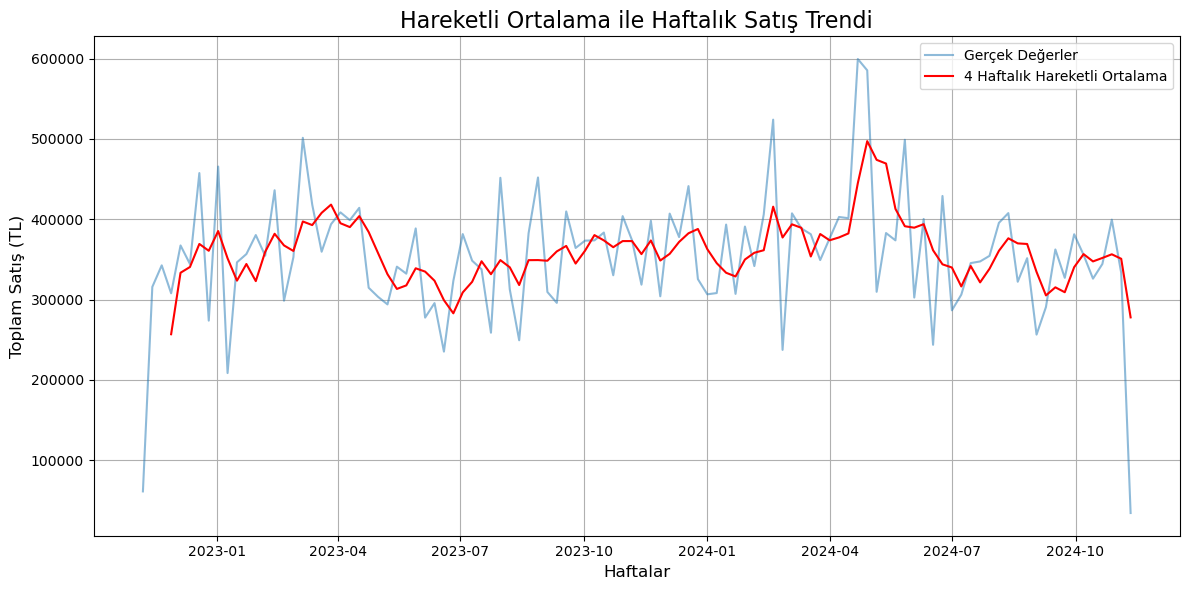

In [31]:
weekly_sales_smoothed = weekly_sales.rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, alpha=0.5, label='Gerçek Değerler')
plt.plot(weekly_sales.index, weekly_sales_smoothed, color='red', label='4 Haftalık Hareketli Ortalama')
plt.title("Hareketli Ortalama ile Haftalık Satış Trendi", fontsize=16)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Kategorilere göre gruplama ve haftalık satışların hesaplanması
- NaN değerleri 0 ile dolduralım (eğer bir kategoride o hafta satış yapılmamışsa)

In [32]:
weekly_category_trends = sales_df.groupby(['kategori', pd.Grouper(key='tarih', freq='W-Mon')])['toplam_satis_kontrol'].sum().unstack('kategori')

weekly_category_trends = weekly_category_trends.fillna(0)
print("Haftalık Kategori Satış Trendleri:\n", weekly_category_trends.head())

Haftalık Kategori Satış Trendleri:
 kategori    Elektronik  Ev Aletleri     Giyim  Kırtasiye  Mutfak Ürünleri
tarih                                                                    
2022-11-07    41575.47         0.00   9834.45    7597.08          2316.49
2022-11-14   157220.22     15637.65  57904.86   76146.91          8961.83
2022-11-21   194167.63     36906.73  10748.93   75024.34         25844.04
2022-11-28   144100.40     45277.51  19934.56   50255.87         48354.57
2022-12-05   203756.61     12008.28  23002.74   80369.32         48314.03


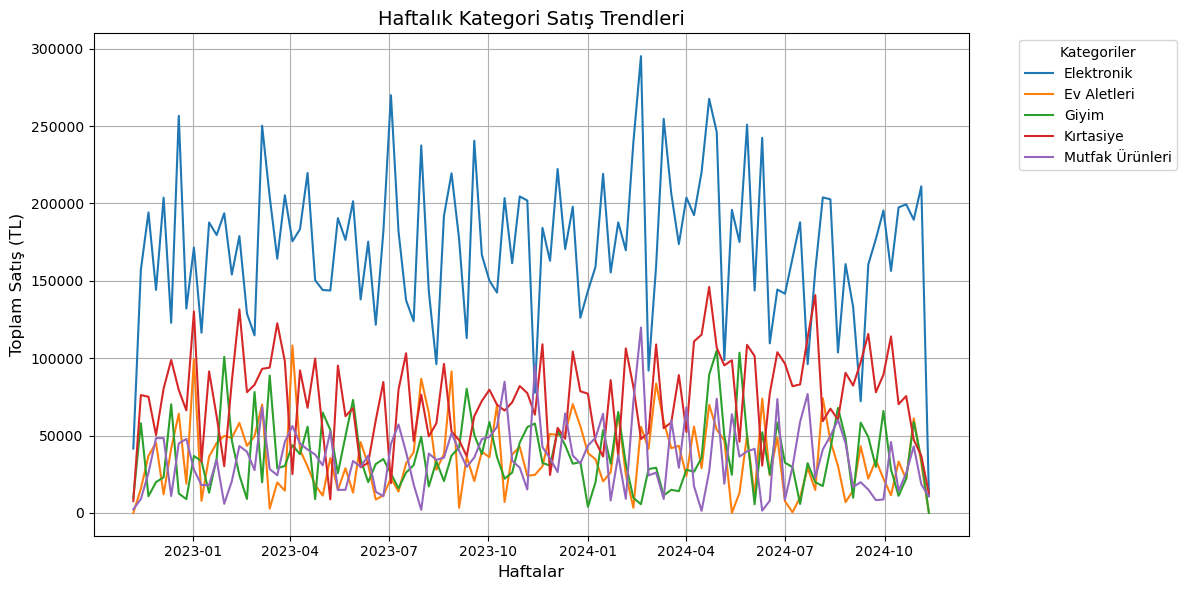

In [33]:
plt.figure(figsize=(12, 6))

for kategori in weekly_category_trends.columns:
    plt.plot(weekly_category_trends.index, weekly_category_trends[kategori], label=kategori)

plt.title("Haftalık Kategori Satış Trendleri", fontsize=14)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend(title="Kategoriler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
top_3_categories = weekly_category_trends.sum().nlargest(3).index
print(top_3_categories)

weekly_category_trends.sum()

Index(['Elektronik', 'Kırtasiye', 'Giyim'], dtype='object', name='kategori')


kategori
Elektronik         1.827569e+07
Ev Aletleri        3.795973e+06
Giyim              3.918756e+06
Kırtasiye          7.857464e+06
Mutfak Ürünleri    3.770860e+06
dtype: float64

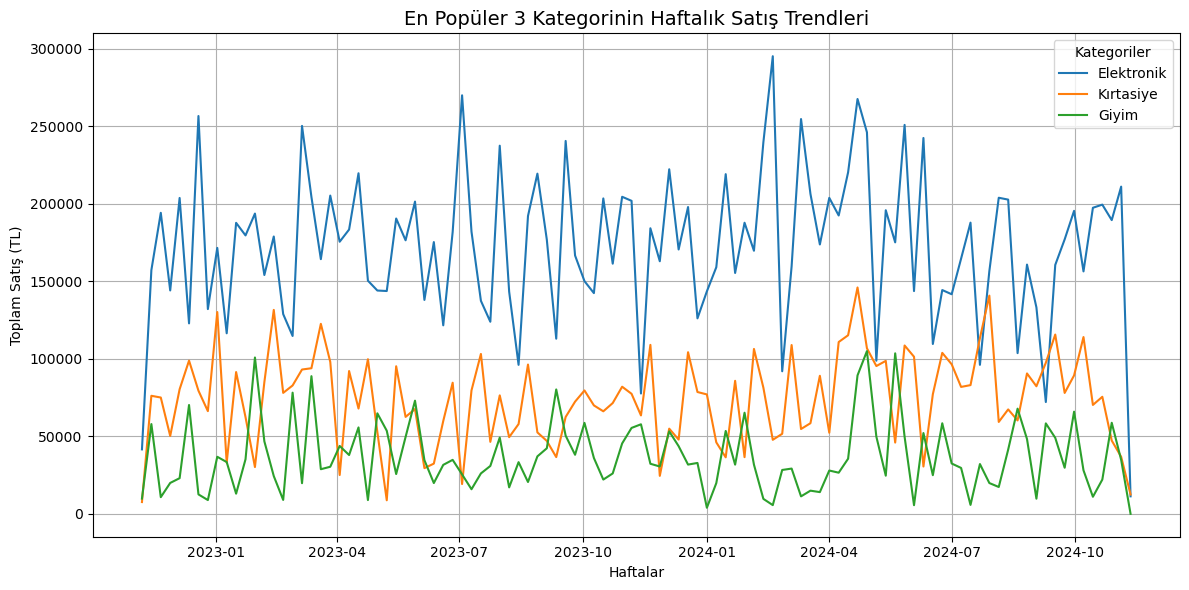

In [35]:
# En popüler 3 kategori
top_3_categories = weekly_category_trends.sum().nlargest(3).index

plt.figure(figsize=(12, 6))
for kategori in top_3_categories:
    plt.plot(weekly_category_trends.index, weekly_category_trends[kategori], label=kategori)

plt.title("En Popüler 3 Kategorinin Haftalık Satış Trendleri", fontsize=14)
plt.xlabel("Haftalar")
plt.ylabel("Toplam Satış (TL)")
plt.legend(title="Kategoriler")
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
haftalik_urun_satis = sales_df.groupby(['ürün_adi']).resample('W', on='tarih')['toplam_satis_kontrol'].sum().unstack()
# print("\nHaftalık Ürün Bazında Satış Trendi:\n", haftalik_urun_satis.head(10))

# Haftalık ürün bazında satışları binlik ayırcaı ile formatladım.
formatted_haftalik_urun_satis = haftalik_urun_satis.applymap(lambda x: f"{x:,.2f}")
print("\nHaftalık Ürün Bazında Satış Trendi:\n", formatted_haftalik_urun_satis.head())


Haftalık Ürün Bazında Satış Trendi:
 tarih      2022-11-06 2022-11-13 2022-11-20 2022-11-27 2022-12-04 2022-12-11  \
ürün_adi                                                                       
Bilgisayar   5,332.44   4,816.92  22,344.51  41,814.45  35,170.18  10,619.19   
Defter            nan  48,192.32  29,476.68  52,963.12  28,203.81  71,886.51   
Fırın             nan  15,637.65  30,962.92  26,477.84  36,751.76  41,601.48   
Kalem        7,597.08  15,377.69  41,719.71  13,697.60  52,165.51   9,097.12   
Klima             nan  30,073.80  52,816.77  32,360.42  15,631.56  19,517.80   

tarih      2022-12-18 2022-12-25 2023-01-01 2023-01-08  ... 2024-09-08  \
ürün_adi                                                ...              
Bilgisayar  61,522.79   3,504.04  27,970.71  31,817.88  ...  30,917.62   
Defter      81,154.01  22,425.63  75,869.47  15,029.35  ...  83,702.71   
Fırın       27,635.31  55,324.31  88,161.72  18,834.53  ...  43,076.26   
Kalem       16,139.55  30,072.5

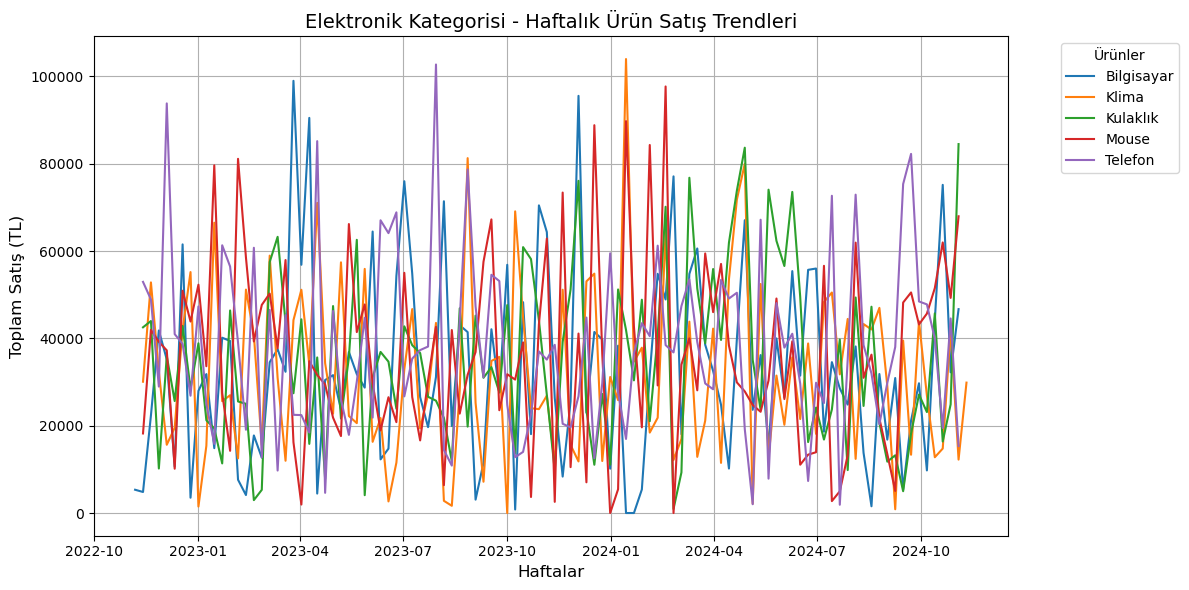

In [37]:
# Kategoriye göre ürün satışlarını grupladım
haftalik_kategori_urun_satis = sales_df.groupby(['kategori', 'ürün_adi']).resample('W', on='tarih')['toplam_satis_kontrol'].sum().unstack()

# Belirli bir kategori için örnek görselleştirme yaptım.
kategori = 'Elektronik'
kategori_urun_satis = haftalik_kategori_urun_satis.loc[kategori]

plt.figure(figsize=(12, 6))
for urun in kategori_urun_satis.index:
    plt.plot(kategori_urun_satis.columns, kategori_urun_satis.loc[urun], label=urun)

plt.title(f"{kategori} Kategorisi - Haftalık Ürün Satış Trendleri", fontsize=14)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend(title="Ürünler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

Aylık Veri Oluşturma

In [38]:
sales_df.set_index('tarih', inplace=True)

aylik_toplam_satis = sales_df.resample('M')['toplam_satis_kontrol'].sum()

formatted_aylik_toplam_satis = aylik_toplam_satis.apply(lambda x: f"{x:,.2f}")

print("Aylık Toplam Satış Trendi:\n", formatted_aylik_toplam_satis)

Aylık Toplam Satış Trendi:
 tarih
2022-11-30    1,131,941.91
2022-12-31    1,718,237.99
2023-01-31    1,432,438.57
2023-02-28    1,482,661.02
2023-03-31    1,841,057.31
2023-04-30    1,526,068.82
2023-05-31    1,513,202.41
2023-06-30    1,142,802.20
2023-07-31    1,662,992.52
2023-08-31    1,455,414.47
2023-09-30    1,633,761.66
2023-10-31    1,602,095.07
2023-11-30    1,557,122.27
2023-12-31    1,596,415.83
2024-01-31    1,539,706.14
2024-02-29    1,530,182.97
2024-03-31    1,740,823.01
2024-04-30    2,052,427.86
2024-05-31    1,747,080.23
2024-06-30    1,427,628.71
2024-07-31    1,512,307.38
2024-08-31    1,511,808.47
2024-09-30    1,467,011.21
2024-10-31    1,582,304.96
2024-11-30      211,246.16
Freq: M, Name: toplam_satis_kontrol, dtype: object


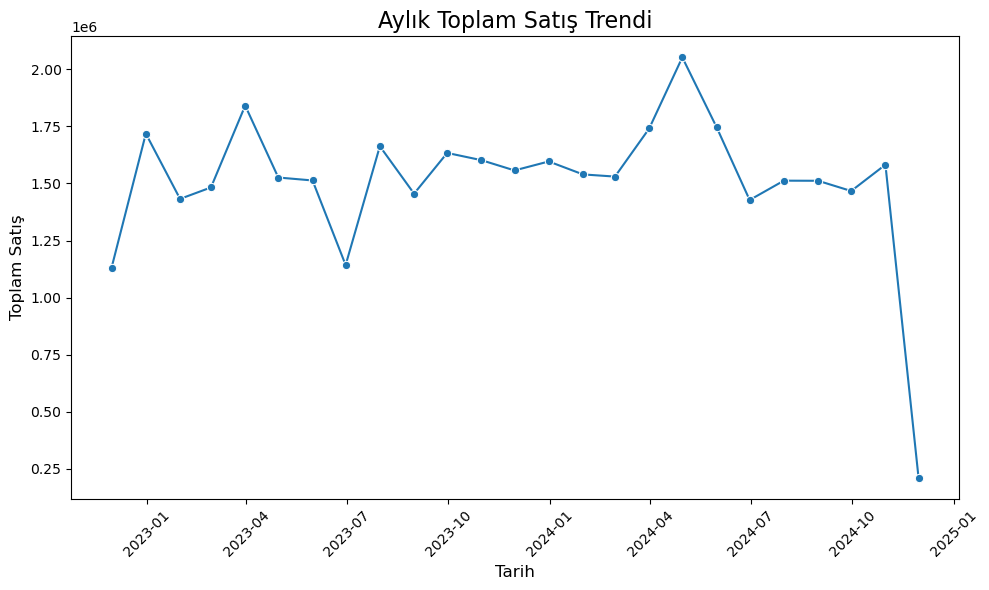

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=aylik_toplam_satis.index, y=aylik_toplam_satis.values, marker='o')

plt.title("Aylık Toplam Satış Trendi", fontsize=16)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Toplam Satış", fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [40]:
aylik_urun_satis = sales_df.groupby(['ürün_kodu']).resample('M')['toplam_satis_kontrol'].sum().unstack()

formatted_aylik_urun_satis = aylik_urun_satis.applymap(lambda x: f"{x:,.2f}")

print("\nAylık Ürün Bazında Satış Trendi:\n", formatted_aylik_urun_satis.head())


Aylık Ürün Bazında Satış Trendi:
 tarih      2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  \
ürün_kodu                                                               
P010       102,251.34  143,161.02  186,934.72  158,263.31  210,774.18   
P011        78,637.03  157,456.34  147,967.32  294,654.70  252,602.78   
P018       166,140.71  212,359.97  177,364.81  117,301.64  128,681.25   
P024        85,284.78  127,810.45  131,534.66   55,150.61  240,340.52   
P032       115,329.15  157,351.91  204,958.06  206,093.03  155,786.92   

tarih      2023-04-30  2023-05-31  2023-06-30  2023-07-31  2023-08-31  ...  \
ürün_kodu                                                              ...   
P010       152,373.42  229,087.56  109,444.67  147,451.81  123,961.60  ...   
P011       163,174.94  129,011.72   43,559.01  183,015.64  112,215.31  ...   
P018       167,812.52  132,884.19  209,426.61  238,518.70  153,306.46  ...   
P024       158,619.34  143,463.82  184,713.67  146,975.68  175,

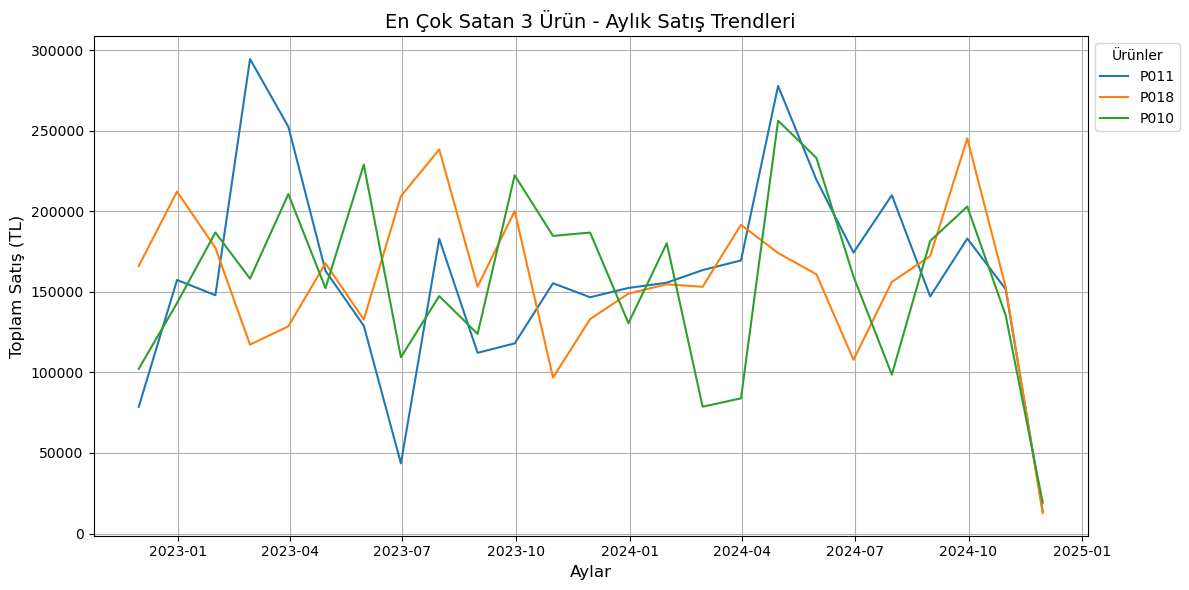

In [41]:
top_3_urunler = aylik_urun_satis.sum(axis=1).nlargest(3).index
top_3_urun_satis = aylik_urun_satis.loc[top_3_urunler]

plt.figure(figsize=(12, 6))

for urun in top_3_urun_satis.index:
    plt.plot(top_3_urun_satis.columns, top_3_urun_satis.loc[urun], label=urun)

plt.title("En Çok Satan 3 Ürün - Aylık Satış Trendleri", fontsize=14)
plt.xlabel("Aylar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend(title="Ürünler", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

In [42]:
sales_df.reset_index(inplace=True)  # Tarih kolonu tekrar DataFrame'de olacak

monthly_sales = sales_df.groupby(pd.Grouper(key='tarih', freq='M')).agg(
    first_sale=('tarih', 'min'),
    last_sale=('tarih', 'max')
).reset_index()


print(monthly_sales)

        tarih first_sale  last_sale
0  2022-11-30 2022-11-06 2022-11-30
1  2022-12-31 2022-12-01 2022-12-31
2  2023-01-31 2023-01-01 2023-01-31
3  2023-02-28 2023-02-01 2023-02-28
4  2023-03-31 2023-03-01 2023-03-31
5  2023-04-30 2023-04-01 2023-04-30
6  2023-05-31 2023-05-01 2023-05-31
7  2023-06-30 2023-06-01 2023-06-30
8  2023-07-31 2023-07-01 2023-07-31
9  2023-08-31 2023-08-01 2023-08-31
10 2023-09-30 2023-09-01 2023-09-30
11 2023-10-31 2023-10-01 2023-10-31
12 2023-11-30 2023-11-01 2023-11-30
13 2023-12-31 2023-12-01 2023-12-31
14 2024-01-31 2024-01-01 2024-01-31
15 2024-02-29 2024-02-01 2024-02-29
16 2024-03-31 2024-03-01 2024-03-31
17 2024-04-30 2024-04-01 2024-04-30
18 2024-05-31 2024-05-01 2024-05-31
19 2024-06-30 2024-06-01 2024-06-30
20 2024-07-31 2024-07-01 2024-07-31
21 2024-08-31 2024-08-01 2024-08-31
22 2024-09-30 2024-09-01 2024-09-30
23 2024-10-31 2024-10-01 2024-10-31
24 2024-11-30 2024-11-01 2024-11-05


pd.Grouper kullanarak ay bazında gruplayıp, her ay için ilk ve son satış gününü buldum.

Her hafta satılan toplam ürün miktarını bulmak için:

In [43]:
sales_df['tarih'] = pd.to_datetime(sales_df['tarih'], errors='coerce')

weekly_sales = sales_df.groupby(pd.Grouper(key='tarih', freq='W')).agg(
    total_products_sold=('adet', 'sum')
).reset_index()

print(weekly_sales.head())

       tarih  total_products_sold
0 2022-11-06                   57
1 2022-11-13                  428
2 2022-11-20                  455
3 2022-11-27                  459
4 2022-12-04                  518


In [44]:
# En çok ve en az satılan haftalar
max_sales_week = weekly_sales.loc[weekly_sales['total_products_sold'].idxmax()]
min_sales_week = weekly_sales.loc[weekly_sales['total_products_sold'].idxmin()]

print(f"En Çok Satılan Hafta: {max_sales_week}")
print(f"En Az Satılan Hafta: {min_sales_week}")

En Çok Satılan Hafta: tarih                  2024-04-28 00:00:00
total_products_sold                    744
Name: 77, dtype: object
En Az Satılan Hafta: tarih                  2022-11-06 00:00:00
total_products_sold                     57
Name: 0, dtype: object


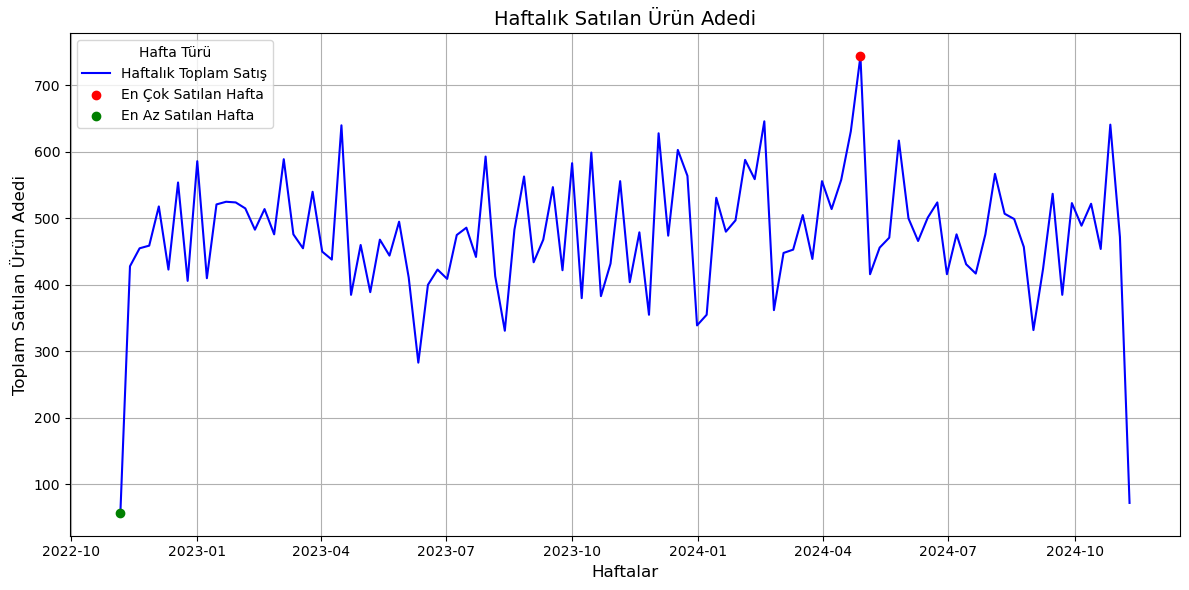

In [45]:
plt.figure(figsize=(12, 6))

plt.plot(weekly_sales['tarih'], weekly_sales['total_products_sold'], label='Haftalık Toplam Satış', color='blue')

plt.scatter(max_sales_week['tarih'], max_sales_week['total_products_sold'], color='red', zorder=5, label='En Çok Satılan Hafta')

plt.scatter(min_sales_week['tarih'], min_sales_week['total_products_sold'], color='green', zorder=5, label='En Az Satılan Hafta')

plt.title("Haftalık Satılan Ürün Adedi", fontsize=14)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satılan Ürün Adedi", fontsize=12)
plt.legend(title="Hafta Türü", loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

Zaman serisindeki trendler:

In [46]:
monthly_sales = sales_df.groupby(pd.Grouper(key='tarih', freq='M')).agg(
    total_sales=('toplam_satis_kontrol', 'sum')
).reset_index()

print(monthly_sales.head())

       tarih   total_sales
0 2022-11-30  1.131942e+06
1 2022-12-31  1.718238e+06
2 2023-01-31  1.432439e+06
3 2023-02-28  1.482661e+06
4 2023-03-31  1.841057e+06


In [47]:
monthly_sales['total_sales'] = pd.to_numeric(monthly_sales['total_sales'], errors='coerce')

monthly_sales['total_sales'] = monthly_sales['total_sales'].fillna(0)

monthly_sales['sales_change'] = monthly_sales['total_sales'].diff()

print(monthly_sales.head(20))

        tarih   total_sales  sales_change
0  2022-11-30  1.131942e+06           NaN
1  2022-12-31  1.718238e+06  586296.07750
2  2023-01-31  1.432439e+06 -285799.41750
3  2023-02-28  1.482661e+06   50222.44875
4  2023-03-31  1.841057e+06  358396.29000
5  2023-04-30  1.526069e+06 -314988.49000
6  2023-05-31  1.513202e+06  -12866.40500
7  2023-06-30  1.142802e+06 -370400.21500
8  2023-07-31  1.662993e+06  520190.32125
9  2023-08-31  1.455414e+06 -207578.05250
10 2023-09-30  1.633762e+06  178347.19000
11 2023-10-31  1.602095e+06  -31666.59125
12 2023-11-30  1.557122e+06  -44972.79875
13 2023-12-31  1.596416e+06   39293.55875
14 2024-01-31  1.539706e+06  -56709.69000
15 2024-02-29  1.530183e+06   -9523.16750
16 2024-03-31  1.740823e+06  210640.04125
17 2024-04-30  2.052428e+06  311604.85000
18 2024-05-31  1.747080e+06 -305347.63000
19 2024-06-30  1.427629e+06 -319451.52000


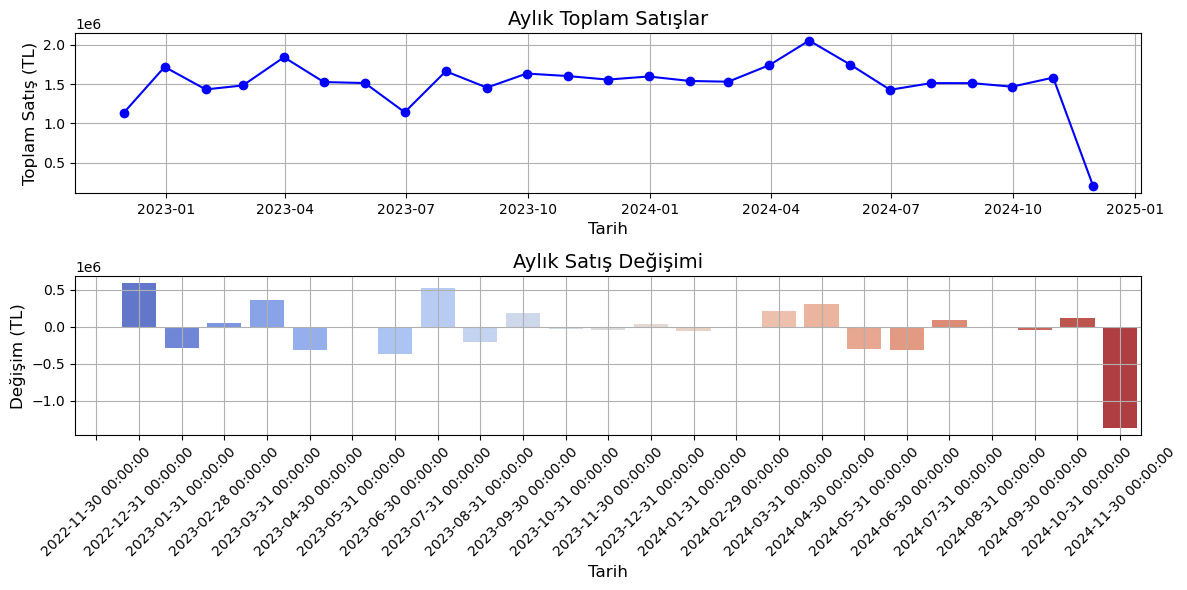

In [48]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1) 
plt.plot(monthly_sales['tarih'], monthly_sales['total_sales'], marker='o', color='b', label='Toplam Satışlar')
plt.title('Aylık Toplam Satışlar', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Toplam Satış (TL)', fontsize=12)
plt.grid(True)

plt.subplot(2, 1, 2)  
sns.barplot(x=monthly_sales['tarih'], y=monthly_sales['sales_change'], palette="coolwarm")
plt.title('Aylık Satış Değişimi', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Değişim (TL)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.tight_layout()
plt.show()

Mavi: Negatif değişimi (düşüş) ifade eder.
Kırmızı: Pozitif değişimi (artış) ifade eder.

Kategorisel ve Sayısal Analiz

1. Ürün kategorilerine göre toplam satış miktarı ve her kategorinin tüm satışlar içindeki oranı:

In [49]:
category_sales = sales_df.groupby('kategori')['toplam_satis_kontrol'].sum()

total_sales = category_sales.sum()
category_sales_percentage = (category_sales / total_sales) * 100

# Yüzdelik satış oranlarıyla birlikte toplam satışları içeren DataFrame oluşturdum
category_sales_summary = pd.DataFrame({
    'Toplam Satis Miktari': category_sales,
    'Satis Orani (%)': category_sales_percentage
}).reset_index()

print(category_sales_summary)

          kategori  Toplam Satis Miktari  Satis Orani (%)
0       Elektronik          1.827569e+07        48.581338
1      Ev Aletleri          3.795973e+06        10.090643
2            Giyim          3.918756e+06        10.417031
3        Kırtasiye          7.857464e+06        20.887100
4  Mutfak Ürünleri          3.770860e+06        10.023887


Elektronik kategorisi toplam satışların %48.6'sını oluşturuyor.Bu, bu kategorinin toplam satış üzerinde önemli bir paya sahip olduğunu gösteriyor.

Ev Aletleri ve Giyim kategorileri sırasıyla %9.89 ve %10.42'lik paylarla daha düşük oranlarda satış yapıyor.

Kırtasiye ve Mutfak Ürünleri kategorileri de sırasıyla %20.8 ve %10.25 oranlarında katkı sağlıyor.

Bu tablo, satış miktarının büyük kısmının "Elektronik" kategorisinde olduğunu ve her kategorinin toplam satış içindeki yüzdesini göstermektedir

2. Müşterilerin yaş gruplarına göre satış eğilimleri:

In [50]:
age_bins = [18, 25, 35, 50, 100]
age_labels = ['18-25', '26-35', '36-50', '50+']
merged_df['yas_grubu'] = pd.cut(merged_df['yas'], bins=age_bins, labels=age_labels, right=False)

In [51]:
age_group_sales = merged_df.groupby('yas_grubu')['toplam_satis_kontrol'].sum()

In [52]:
total_sales = age_group_sales.sum()
age_group_sales_percentage = (age_group_sales / total_sales) * 100

Toplam Satış Oranı: Her yaş grubunun toplam satışlar içindeki yüzdesini bulun.

In [53]:
age_group_sales_summary = pd.DataFrame({
    'Toplam Satis Miktari': age_group_sales,
    'Satis Orani (%)': age_group_sales_percentage
}).reset_index()
print(age_group_sales_summary)

  yas_grubu  Toplam Satis Miktari  Satis Orani (%)
0     18-25          5.375222e+06        14.288681
1     26-35          6.851934e+06        18.214150
2     36-50          1.122559e+07        29.840426
3       50+          1.416599e+07        37.656742


3. Kadın ve erkek müşterilerin harcama miktarları ve harcama davranışları arasındaki farkı 

In [54]:
cinsiyet_sayisi = merged_df['cinsiyet'].value_counts()
print(cinsiyet_sayisi)

cinsiyet
Kadın    2531
Erkek    2469
Name: count, dtype: int64


In [55]:
cinsiyet_harcama = merged_df.groupby('cinsiyet')['harcama_miktari'].sum()

In [56]:
ortalama_harcama = merged_df.groupby('cinsiyet')['harcama_miktari'].median()

In [57]:
cinsiyet_karsilastirma = pd.DataFrame({
    'Toplam Harcama': cinsiyet_harcama,
    'Ortalama Harcama': ortalama_harcama
}).reset_index()
print(cinsiyet_karsilastirma)

  cinsiyet  Toplam Harcama  Ortalama Harcama
0    Erkek      6348599.97           2559.87
1    Kadın      6606229.86           2589.07


- Kadınların toplam harcaması, erkeklere kıyasla daha yüksektir. Bu, kadınların toplamda daha fazla harcama yaptığına işaret eder.
- Kadınlar toplamda daha fazla harcama yapmış, bu farkın büyük bir kısmı kadın sayısının erkeklerden fazla olmasıdır.
- Ortalama harcama değerlerine baktığımızda, kadınların başına düşen harcama erkeklere göre biraz daha yüksek. Ancak bu fark, oldukça küçüktür ve sadece 29,2 TL'lik bir fark vardır.

#
İleri Düzey Veri Manipülasyonu

1. Müşterilerin şehir bazında toplam harcama miktarı


In [58]:
unique_sehir_count = merged_df['sehir'].nunique()
print("Benzersiz şehir sayısı:", unique_sehir_count)

Benzersiz şehir sayısı: 8


In [59]:
sehir_harcama = merged_df.groupby('sehir')['toplam_satis_kontrol'].sum().reset_index()

sehir_harcama_sorted = sehir_harcama.sort_values(by='toplam_satis_kontrol', ascending=False)

print(sehir_harcama_sorted)

       sehir  toplam_satis_kontrol
4  Gaziantep          4.933956e+06
3      Bursa          4.925231e+06
7      İzmir          4.912253e+06
2    Antalya          4.714712e+06
5      Konya          4.629271e+06
1     Ankara          4.622167e+06
0      Adana          4.593525e+06
6   İstanbul          4.287625e+06


In [60]:
musteri_harcama = merged_df.groupby('musteri_id')['toplam_satis_kontrol'].sum().reset_index()

# Şehirlere göre toplam harcama hesapladım ve her şehirdeki en çok harcama yapan müşteriyi buldum
sehir_harcama_musteri = merged_df.groupby(['sehir', 'musteri_id'])['toplam_satis_kontrol'].sum().reset_index()

# Her şehirdeki en çok harcama yapan müşteriyi bulmak için her şehir için maksimum harcamayı seçtim
en_cok_harcama_yapan = sehir_harcama_musteri.loc[sehir_harcama_musteri.groupby('sehir')['toplam_satis_kontrol'].idxmax()]

# Şehirlere göre sıralama yaptım (en çok harcama yapan müşteri bazında)
en_cok_harcama_yapan_sorted = en_cok_harcama_yapan.sort_values(by='toplam_satis_kontrol', ascending=False)


print(en_cok_harcama_yapan_sorted)

          sehir  musteri_id  toplam_satis_kontrol
1245      Bursa        2520           64990.28000
497      Ankara        3558           59700.21000
2784      İzmir        1916           55941.11875
282       Adana        7380           55240.36000
2689   İstanbul        8394           53566.82000
1136    Antalya        9088           53092.91000
1940  Gaziantep        9566           47962.53000
2054      Konya        3175           43101.55000


Şehirlerin sıralamasını, en çok harcama yapan müşterilere göre görebiliriz.

Bölgesel Farklar: Adana, Bursa ve Konya gibi şehirlerde daha büyük harcamalar gözlemleniyor. Bu durum, bu şehirlerdeki belirli müşteri segmentlerinin veya ekonomik faaliyetlerin farklı olduğuna işaret edebilir. Bu şehirlerdeki yüksek harcamalar, belirli bir müşteri kitlesinin güçlü alım gücünü gösterebilir.

Büyük Şehirlerin Durumu: İstanbul, İzmir, Antalya ve Ankara gibi büyük şehirlerdeki en yüksek harcama rakamları daha düşük. Bu şehirlerde genellikle daha fazla müşteri bulunduğu için, en yüksek harcama yapan müşteri sayılarının daha geniş bir gruptan geldiği düşünülebilir. Bu da, şehirdeki yoğunluk nedeniyle en fazla harcama yapan müşteri tutarlarının daha düşük olmasını açıklayabilir.

2. Satış verisinde her bir ürün için ortalama satış artışı oranı:

In [61]:
sales_df['tarih'] = pd.to_datetime(sales_df['tarih'])

sales_df['yil_ay'] = sales_df['tarih'].dt.to_period('M')

# Ürün ve ay bazında toplam satış adedini hesapladım.
urun_aylik_satis = sales_df.groupby(['ürün_kodu', 'yil_ay'])['adet'].sum().reset_index()

# Satış değişim yüzdesini hesapladım. (önceki aya göre değişim)
urun_aylik_satis['satis_degisimi'] = urun_aylik_satis.groupby('ürün_kodu')['adet'].pct_change() * 100

# Ortalama satış artışı oranını her ürün için hesapladım.
ortalama_satis_artisi = urun_aylik_satis.groupby('ürün_kodu')['satis_degisimi'].mean().reset_index()

print(ortalama_satis_artisi.head())

  ürün_kodu  satis_degisimi
0      P010        4.617467
1      P011       11.632030
2      P018       -2.015909
3      P024       16.172751
4      P032        4.523185


Pandas groupby ile her bir kategorinin aylık toplam satışları

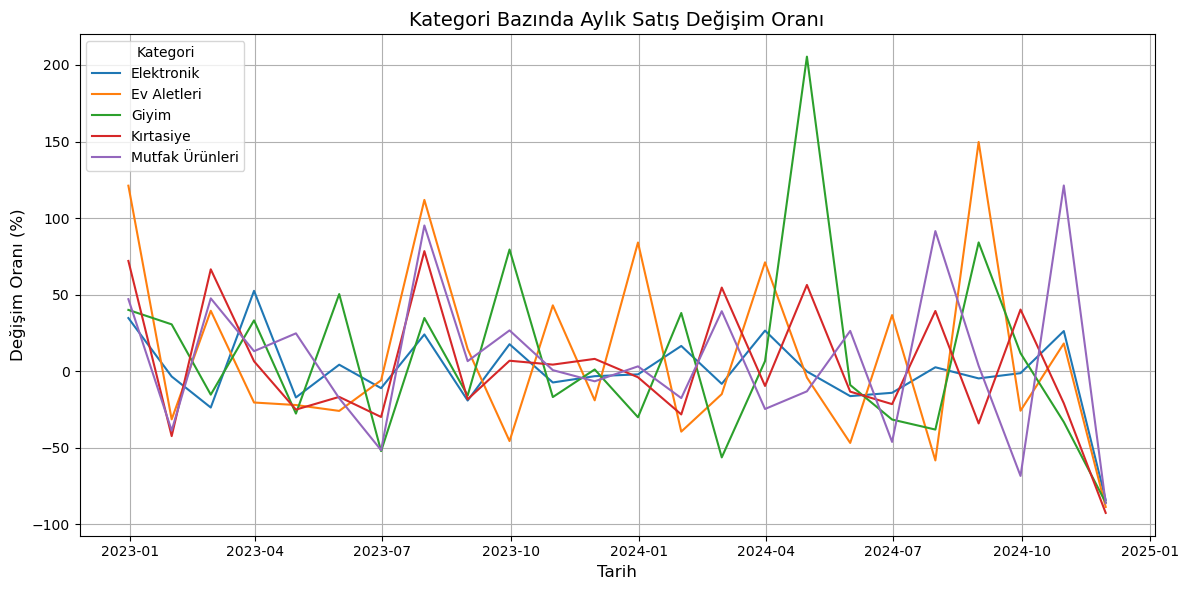

In [62]:
# Aylık toplam satışları hesapladım.
kategori_aylik_satis = sales_df.groupby([pd.Grouper(key='tarih', freq='M'), 'kategori'])['toplam_satis_kontrol'].sum().unstack()

kategori_aylik_satis_change = kategori_aylik_satis.pct_change() * 100  

plt.figure(figsize=(12, 6))

for kategori in kategori_aylik_satis_change.columns:
    plt.plot(kategori_aylik_satis_change.index, kategori_aylik_satis_change[kategori], label=kategori)

plt.title("Kategori Bazında Aylık Satış Değişim Oranı", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Değişim Oranı (%)", fontsize=12)
plt.legend(title="Kategori", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Cohort Analizi

In [63]:
merged_df['tarih'] = pd.to_datetime(merged_df['tarih'])

merged_df['ilk_satin_alma_tarihi'] = merged_df.groupby('musteri_id')['tarih'].transform('min')

merged_df['cohort_month'] = merged_df['ilk_satin_alma_tarihi'].dt.to_period('M')

merged_df['satın_alma_ay'] = merged_df['tarih'].dt.to_period('M')

print(merged_df[['musteri_id', 'ilk_satin_alma_tarihi', 'cohort_month', 'satın_alma_ay']].head())

   musteri_id ilk_satin_alma_tarihi cohort_month satın_alma_ay
0        9225            2023-07-02      2023-07       2023-07
1        3955            2023-05-13      2023-05       2024-02
2        2367            2023-03-06      2023-03       2023-03
3        2869            2024-04-11      2024-04       2024-04
4        9724            2024-01-08      2024-01       2024-01


In [64]:
merged_df['cohort_index'] = (merged_df['satın_alma_ay'].dt.year - merged_df['cohort_month'].dt.year) * 12 + (merged_df['satın_alma_ay'].dt.month - merged_df['cohort_month'].dt.month) + 1
print(merged_df[['musteri_id', 'cohort_month', 'satın_alma_ay', 'cohort_index']].head())

   musteri_id cohort_month satın_alma_ay  cohort_index
0        9225      2023-07       2023-07             1
1        3955      2023-05       2024-02            10
2        2367      2023-03       2023-03             1
3        2869      2024-04       2024-04             1
4        9724      2024-01       2024-01             1


In [65]:
cohort_data = merged_df.pivot_table(index='cohort_month', columns='cohort_index', values='musteri_id', aggfunc='nunique')
cohort_sizes = cohort_data.iloc[:, 0]

cohort_retention = cohort_data.divide(cohort_sizes, axis=0)

cohort_retention = cohort_retention.fillna(0)

cohort_retention = cohort_retention * 100
print(cohort_retention)

cohort_index     1         2         3         4         5         6   \
cohort_month                                                            
2022-11       100.0  3.246753  5.844156  3.246753  3.246753  5.194805   
2022-12       100.0  3.482587  3.482587  2.985075  3.980100  4.477612   
2023-01       100.0  4.787234  5.851064  4.255319  3.723404  3.723404   
2023-02       100.0  5.202312  2.312139  4.624277  3.468208  4.624277   
2023-03       100.0  3.763441  4.301075  0.537634  5.376344  2.150538   
2023-04       100.0  6.666667  3.030303  4.848485  2.424242  2.424242   
2023-05       100.0  1.290323  6.451613  2.580645  3.870968  3.870968   
2023-06       100.0  5.000000  4.285714  3.571429  6.428571  4.285714   
2023-07       100.0  8.000000  2.666667  4.000000  3.333333  8.000000   
2023-08       100.0  5.511811  3.149606  3.937008  6.299213  1.574803   
2023-09       100.0  3.289474  3.947368  3.947368  4.605263  5.263158   
2023-10       100.0  6.034483  3.448276  5.172414  

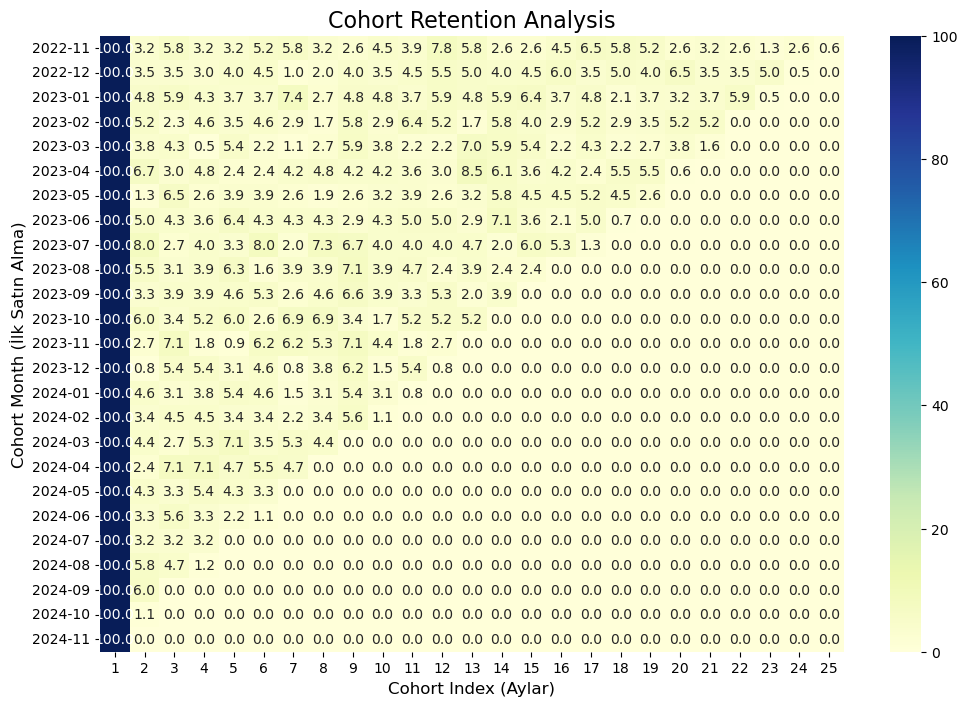

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention, annot=True, fmt='.1f', cmap="YlGnBu", cbar=True)
plt.title('Cohort Retention Analysis', fontsize=16)
plt.xlabel('Cohort Index (Aylar)', fontsize=12)
plt.ylabel('Cohort Month (İlk Satın Alma)', fontsize=12)
plt.show()

In [67]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             5000 non-null   int64         
 1   tarih                  5000 non-null   datetime64[ns]
 2   ürün_kodu              5000 non-null   object        
 3   ürün_adi               5000 non-null   object        
 4   kategori               5000 non-null   object        
 5   fiyat                  5000 non-null   float64       
 6   adet                   5000 non-null   int64         
 7   toplam_satis           5000 non-null   object        
 8   musteri_id             5000 non-null   int64         
 9   toplam_satis_kontrol   5000 non-null   float64       
 10  isim                   5000 non-null   object        
 11  cinsiyet               5000 non-null   object        
 12  yas                    5000 non-null   int64         
 13  seh

Tahmin Modeli

In [68]:
merged_df['tarih'] = pd.to_datetime(merged_df['tarih'], errors='coerce')
merged_df['ay'] = merged_df['tarih'].dt.month
merged_df['yıl'] = merged_df['tarih'].dt.year
merged_df['Age_Group'] = pd.cut(merged_df['yas'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '50+'])

merged_df = pd.get_dummies(merged_df, columns=['kategori', 'ürün_adi', 'cinsiyet', 'sehir'], drop_first=True)

print(merged_df.head())

# Model için özellik ve hedef değişkenlerin belirlenmesi
X = merged_df[['yıl', 'ay', 'fiyat', 'adet', 'yas', 'harcama_miktari'] + 
              [col for col in merged_df.columns if 'kategori_' in col or 'ürün_adi_' in col or 'cinsiyet_' in col or 'sehir_' in col]]
y = merged_df['toplam_satis_kontrol']

   Unnamed: 0      tarih ürün_kodu    fiyat  adet       toplam_satis  \
0           0 2023-07-02      P032  1207.30    13            15694.9   
1           1 2024-02-11      P011   237.14    16            3794.24   
2           2 2023-03-06      P024  1024.29     9            9218.61   
3           3 2024-04-11      P063  1477.88     9  13300920000000000   
4           4 2024-01-08      P063   949.43    19           18039.17   

   musteri_id  toplam_satis_kontrol    isim  yas  ...  ürün_adi_Telefon  \
0        9225              15694.90  Masume   35  ...             False   
1        3955               3794.24   Fenni   64  ...             False   
2        2367               9218.61  Feyruz   45  ...             False   
3        2869              13300.92    Ülke   43  ...             False   
4        9724              18039.17  Tonguç   41  ...             False   

  ürün_adi_Çanta cinsiyet_Kadın sehir_Ankara sehir_Antalya  sehir_Bursa  \
0          False           True        Fa

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Skoru: {r2}')


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = mse ** 0.5
print(f'RMSE: {rmse}')

R^2 Skoru: 0.877700445869787
Mean Squared Error (MSE): 5150341.024543655
RMSE: 2269.4362790225364
